<a href="https://colab.research.google.com/github/kacp-i/BCU-Work/blob/main/Y2%20S1%20CMP-5367%20Artificial%20Intelligence%20and%20Machine%20Learning/Assesment/AI_dataset_stuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library Imports

In [ ]:
# importing libraries used throughout the training & model
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')

from scipy.stats import skewnorm

# libraries used for encoding data for the dataset, training different models and evaluating each model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from statsmodels.graphics.mosaicplot import mosaic

import warnings
warnings.filterwarnings('ignore')

#Importing the dataset

In [ ]:
# mounting the google drive - can comment this out and use the upload feature below
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# grab the csv file from the google drive
ds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI report stuff/motorbike.csv')

In [ ]:
# alternative upload method to google drive
# from google.colab import files
# file = files.upload()

#Exploring the dataset

In [ ]:
# shows the first 5 rows of the dataset & the column headers
ds.head()

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
0,23990,150,218.0,Honda,03/2020,Gasoline,Manual,Demonstration,CBR1000RR-R Fireblade SP,/offers/honda-others-cbr1000rr-r-fireblade-sp-...
1,7500,2871,90.0,BMW F 800 GT,09/2018,Gasoline,Manual,Used,NaN,/offers/bmw-f-800-gt-gasoline-white-f65273c6-6...
2,800,1700,3.0,Nova Motors Retro Star,10/2019,Gasoline,NaN,Used,NaN,/offers/nova-motors-retro-star-gasoline-red-f8...
3,14990,24345,NaN,Aprilia RSV4,03/2016,Gasoline,NaN,Used,RF,/offers/aprilia-rsv4-rf-gasoline-silver-1b51fe...
4,6200,25000,128.0,Kawasaki Ninja ZX-6R,08/2009,Gasoline,NaN,Used,NaN,/offers/kawasaki-ninja-zx-6r-gasoline-blue-2f8...


In [ ]:
# shows all of the columns and their datatype and how many non-null cells they have
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34917 entries, 0 to 34916
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       34917 non-null  int64  
 1   mileage     34917 non-null  int64  
 2   power       28598 non-null  float64
 3   make_model  34917 non-null  object 
 4   date        34917 non-null  object 
 5   fuel        31727 non-null  object 
 6   gear        12847 non-null  object 
 7   offer_type  34917 non-null  object 
 8   version     17413 non-null  object 
 9   link        34917 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.7+ MB


### Describing the columns:

- price: value of the motorbike
- mileage: how many miles the motorbike has driven
- power: CC
- make_model: the make and the model of the motorbike
- date: date of manufacture (MM/YYYY)
- fuel: type of fuel used
- gear: the transmission type
- offer_type: condition / state of motorbike
- version: alternative version of a model
- link: part of the url where the offer is found

#Abstracting data

In [ ]:
# showing the dataset information
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34917 entries, 0 to 34916
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       34917 non-null  int64  
 1   mileage     34917 non-null  int64  
 2   power       28598 non-null  float64
 3   make_model  34917 non-null  object 
 4   date        34917 non-null  object 
 5   fuel        31727 non-null  object 
 6   gear        12847 non-null  object 
 7   offer_type  34917 non-null  object 
 8   version     17413 non-null  object 
 9   link        34917 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.7+ MB


In [ ]:
# dropping useless columns
ds = ds.drop(['version', 'link'], axis=1)

In [ ]:
#showing null values in the dataset
ds.isnull().sum()

,0
price,0
mileage,0
power,6319
make_model,0
date,0
fuel,3190
gear,22070
offer_type,0


## Replacing the null values in the dataset

### Power Column

In [ ]:
# finding the most common value in the column
ds['power'].value_counts()

,count
power,
125.0,1594
110.0,1068
95.0,862
48.0,720
160.0,684
...,...
880.0,1
409.0,1
468.0,1


In [ ]:
# will be using 125 as the value to replace the null values as it is the most common one
ds['power'] = ds['power'].fillna(value=125)

In [ ]:
# checking if the fillna function applied properly to the column
ds.isnull().sum()

,0
price,0
mileage,0
power,0
make_model,0
date,0
fuel,3190
gear,22070
offer_type,0


### Fuel Column

In [ ]:
# finding the most common value in the column
ds['fuel'].value_counts()

,count
fuel,
Gasoline,30494
Two Stroke Gasoline,497
Electric,411
Others,171
Diesel,144
Electric/Gasoline,8
LPG,2


In [ ]:
# will be using gasoline as the value to replace the null values as it is the most common one
ds['fuel'] = ds['fuel'].fillna(value="Gasoline")

In [ ]:
# checking if the fillna function applied properly to the column
ds.isnull().sum()

,0
price,0
mileage,0
power,0
make_model,0
date,0
fuel,0
gear,22070
offer_type,0


### Gear Column

In [ ]:
# finding the most common value in the column
ds['gear'].value_counts()

,count
gear,
Manual,10364
Automatic,2174
Semi-automatic,309


In [ ]:
# will be using manual as the value to replace the null values as it is the most common one
ds['gear'] = ds['gear'].fillna(value="Manual")

In [ ]:
# checking if the fillna function applied properly to the column
ds.isnull().sum()

,0
price,0
mileage,0
power,0
make_model,0
date,0
fuel,0
gear,0
offer_type,0


# Data manipulation

In [ ]:
# describing the dataset pre-encoding
ds.describe()

,price,mileage,power
count,3.491700e+04,3.491700e+04,34917.000000
mean,4.568532e+04,2.183175e+04,191.470344
std,4.850120e+06,2.059421e+05,8481.187105
min,1.000000e+00,0.000000e+00,1.000000
25%,6.999000e+03,2.932000e+03,60.000000
50%,9.920000e+03,1.100000e+04,107.000000
75%,1.259000e+04,2.500000e+04,125.000000
max,8.888889e+08,9.999999e+06,913595.000000


In [ ]:
# checking which columns need to be converted from object datatype to int datatype
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34917 entries, 0 to 34916
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       34917 non-null  int64  
 1   mileage     34917 non-null  int64  
 2   power       34917 non-null  float64
 3   make_model  34917 non-null  object 
 4   date        34917 non-null  object 
 5   fuel        34917 non-null  object 
 6   gear        34917 non-null  object 
 7   offer_type  34917 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.1+ MB


## Make & Model Column Splitting and Encoding

In [ ]:
# checking the values and their amounts in the column
ds['make_model'].value_counts()

,count
make_model,
BMW R 1200 GS,929
BMW R nineT,543
BMW R 1200 GS Adventure,409
Harley-Davidson Softail,393
Kawasaki Z 900,384
...,...
Fantic 250E,1
Kawasaki ZX 500,1
Aprilia Amico 50,1


In [ ]:
# splitting the make_model column into make and model by using ' ' as the delimiter
# limiting the amount of slices to 2 by using n = 1
splitMakeModel = ds['make_model'].str.split(' ', n = 1, expand=True)

# creating a new column for make
ds['make'] = splitMakeModel[0]

# dropping the old column from the dataset as it is unnecessary
ds = ds.drop('make_model', axis=1)

In [ ]:
# checking the values in the column
ds['make'].value_counts()

,count
make,
BMW,6935
Harley-Davidson,3949
Honda,3628
Yamaha,3536
Ducati,2505
...,...
Saxon,1
Silence,1
Sumco,1


In [ ]:
# creating a variable for the encoder
lblMake = LabelEncoder()

# grab each unique variable from the column and turn it into its numerical version
lblMake.fit(ds['make'].drop_duplicates())

# create a new column and apply the encoding values
ds['makeEncoded'] = lblMake.transform(ds['make'])

In [ ]:
# checking which numerical value corresponds to the non-numerical value
ds[['make', 'makeEncoded']].value_counts()

,,count
make,makeEncoded,
BMW,19,6935
Harley-Davidson,85,3949
Honda,90,3628
Yamaha,226,3536
Ducati,54,2505
...,...,...
Oldtimer,152,1
FK,69,1
Sumco,196,1


In [ ]:
# create a new file to hold all of the makes of the motorbikes with their encoded number variant
# as there are too many unique values to show as an output - you can reference the .txt file
# when using user predictions
makeFile = open("make.txt", "w")

# write the non-numerical and numerical values to a text file
makeFile.write(ds[['make', 'makeEncoded']].to_string())

# close the file to save it
makeFile.close()

In [ ]:
# dropping the old column from the dataset as it is unnecessary
ds = ds.drop('make', axis=1)

## Sorting and splitting the date column

In [ ]:
# checking the values of date column to see if they are all dates
# some rows contain the value "- (First Registration)" which is not a date
ds['date'].value_counts()

,count
date,
01/2021,1835
01/2020,615
03/2021,471
01/2019,423
06/2018,420
...,...
07/1928,1
08/1987,1
11/1976,1


In [ ]:
# replacing the non-date value "- (First Registration)" in the column to a chosen date
ds['date'] = ds['date'].replace("- (First Registration)", "12/2024")

In [ ]:
# splitting the date column into month and year by using '/' as the delimiter
splitDate = ds['date'].str.split('/', expand=True)

# creating new columns for year and month
ds['month'] = splitDate[0]
ds['year'] = splitDate[1]

# dropping the old date column from the dataset as it is unnecessary
ds = ds.drop('date', axis=1)

In [ ]:
# converting the date and month column into int datatype from object datatype
ds[['month', 'year']] = ds[['month', 'year']].astype(str).astype(int)

In [ ]:
# checking if the conversion has been completed properly
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34917 entries, 0 to 34916
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        34917 non-null  int64  
 1   mileage      34917 non-null  int64  
 2   power        34917 non-null  float64
 3   fuel         34917 non-null  object 
 4   gear         34917 non-null  object 
 5   offer_type   34917 non-null  object 
 6   makeEncoded  34917 non-null  int64  
 7   month        34917 non-null  int64  
 8   year         34917 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 2.4+ MB


## Fuel Column Encoding

In [ ]:
# checking the values in the column
ds['fuel'].value_counts()

,count
fuel,
Gasoline,33684
Two Stroke Gasoline,497
Electric,411
Others,171
Diesel,144
Electric/Gasoline,8
LPG,2


In [ ]:
# creating a variable for the encoder
lblFuel = LabelEncoder()

# grab each unique variable from the column and turn it into its numerical version
lblFuel.fit(ds['fuel'].drop_duplicates())

# create a new column and apply the encoding values
ds['fuelEncoded'] = lblFuel.transform(ds['fuel'])

In [ ]:
# checking which numerical value corresponds to the non-numerical value
ds[['fuel', 'fuelEncoded']].value_counts()

,,count
fuel,fuelEncoded,
Gasoline,3,33684
Two Stroke Gasoline,6,497
Electric,1,411
Others,5,171
Diesel,0,144
Electric/Gasoline,2,8
LPG,4,2


**Non-numerical value | Numerical value**

- Diesel = 0
- Electric = 1
- Electric/Gasoline = 2
- Gasoline = 3
- LPG = 4
- Others = 5
- Two Stroke Gasoline = 6

In [ ]:
# dropping the old column from the dataset as it is unnecessary
ds = ds.drop('fuel', axis=1)

## Gear Column Encoding

In [ ]:
# checking the values in the column
ds['gear'].value_counts()

,count
gear,
Manual,32434
Automatic,2174
Semi-automatic,309


In [ ]:
# creating a variable for the encoder
lblGear = LabelEncoder()

# grab each unique variable from the column and turn it into its numerical version
lblGear.fit(ds['gear'].drop_duplicates())

# create a new column and apply the encoding values
ds['gearEncoded'] = lblGear.transform(ds['gear'])

In [ ]:
# checking which numerical value corresponds to the non-numerical value
ds[['gear', 'gearEncoded']].value_counts()

,,count
gear,gearEncoded,
Manual,1,32434
Automatic,0,2174
Semi-automatic,2,309


**Non-numerical value | Numerical value**
- Automatic = 0
- Manual = 1
- Semi-automatic = 2

In [ ]:
# dropping the old column from the dataset as it is unnecessary
ds = ds.drop('gear', axis=1)

## Offer Type Column Encoding

In [ ]:
# checking the values in the column
ds['offer_type'].value_counts()

,count
offer_type,
Used,31723
New,1957
Demonstration,776
Pre-registered,275
Antique / Classic,186


In [ ]:
# creating a variable for the encoder
lblOffer = LabelEncoder()

# grab each unique variable from the column and turn it into its numerical version
lblOffer.fit(ds['offer_type'].drop_duplicates())

# create a new column and apply the encoding values
ds['offerEncoded'] = lblOffer.transform(ds['offer_type'])

In [ ]:
# checking which numerical value corresponds to the non-numerical value
ds[['offer_type', 'offerEncoded']].value_counts()

,,count
offer_type,offerEncoded,
Used,4,31723
New,2,1957
Demonstration,1,776
Pre-registered,3,275
Antique / Classic,0,186


**Non-numerical value | Numerical value**
- Antique / Classic = 0
- Demonstartion = 1
- New = 2
- Pre-registered = 3
- Used = 4

In [ ]:
# dropping the old column from the dataset as it is unnecessary
ds = ds.drop('offer_type', axis=1)

## Final Check

In [ ]:
# checking each column
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34917 entries, 0 to 34916
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         34917 non-null  int64  
 1   mileage       34917 non-null  int64  
 2   power         34917 non-null  float64
 3   makeEncoded   34917 non-null  int64  
 4   month         34917 non-null  int64  
 5   year          34917 non-null  int64  
 6   fuelEncoded   34917 non-null  int64  
 7   gearEncoded   34917 non-null  int64  
 8   offerEncoded  34917 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 2.4 MB


In [ ]:
# describing the dataset
ds.describe()

,price,mileage,power,makeEncoded,month,year,fuelEncoded,gearEncoded,offerEncoded
count,3.491700e+04,3.491700e+04,34917.000000,34917.000000,34917.000000,34917.000000,34917.000000,34917.000000,34917.000000
mean,4.568532e+04,2.183175e+04,191.470344,105.221239,5.121975,2013.497981,3.016410,0.946588,3.792050
std,4.850120e+06,2.059421e+05,8481.187105,69.737562,3.058484,10.074492,0.481577,0.261267,0.688537
min,1.000000e+00,0.000000e+00,1.000000,0.000000,1.000000,1907.000000,0.000000,0.000000,0.000000
25%,6.999000e+03,2.932000e+03,60.000000,54.000000,3.000000,2012.000000,3.000000,1.000000,4.000000
50%,9.920000e+03,1.100000e+04,107.000000,90.000000,5.000000,2016.000000,3.000000,1.000000,4.000000
75%,1.259000e+04,2.500000e+04,125.000000,162.000000,7.000000,2019.000000,3.000000,1.000000,4.000000
max,8.888889e+08,9.999999e+06,913595.000000,235.000000,12.000000,2024.000000,6.000000,2.000000,4.000000


## Cleaning up the dataset

In [ ]:
# renaming columns to make it more meaningful
ds.rename(columns = {'price' : 'Value',
                     'mileage' : 'Mileage',
                     'power' : 'Power',
                     'makeEncoded' : 'Make',
                     'month' : 'Month',
                     'year' : 'Year',
                     'fuelEncoded' : 'Fuel Type',
                     'gearEncoded' : 'Transmission Type',
                     'offerEncoded' : 'State of Vehicle'},
          inplace=True)

In [ ]:
# checking if changes have been applied
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34917 entries, 0 to 34916
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Value              34917 non-null  int64  
 1   Mileage            34917 non-null  int64  
 2   Power              34917 non-null  float64
 3   Make               34917 non-null  int64  
 4   Month              34917 non-null  int64  
 5   Year               34917 non-null  int64  
 6   Fuel Type          34917 non-null  int64  
 7   Transmission Type  34917 non-null  int64  
 8   State of Vehicle   34917 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 2.4 MB


# Visualisation & Clearing Outliers / Noise

In [ ]:
# describing the dataset
ds.describe()

,Value,Mileage,Power,Make,Month,Year,Fuel Type,Transmission Type,State of Vehicle
count,3.491700e+04,3.491700e+04,34917.000000,34917.000000,34917.000000,34917.000000,34917.000000,34917.000000,34917.000000
mean,4.568532e+04,2.183175e+04,191.470344,105.221239,5.121975,2013.497981,3.016410,0.946588,3.792050
std,4.850120e+06,2.059421e+05,8481.187105,69.737562,3.058484,10.074492,0.481577,0.261267,0.688537
min,1.000000e+00,0.000000e+00,1.000000,0.000000,1.000000,1907.000000,0.000000,0.000000,0.000000
25%,6.999000e+03,2.932000e+03,60.000000,54.000000,3.000000,2012.000000,3.000000,1.000000,4.000000
50%,9.920000e+03,1.100000e+04,107.000000,90.000000,5.000000,2016.000000,3.000000,1.000000,4.000000
75%,1.259000e+04,2.500000e+04,125.000000,162.000000,7.000000,2019.000000,3.000000,1.000000,4.000000
max,8.888889e+08,9.999999e+06,913595.000000,235.000000,12.000000,2024.000000,6.000000,2.000000,4.000000


## Power Column

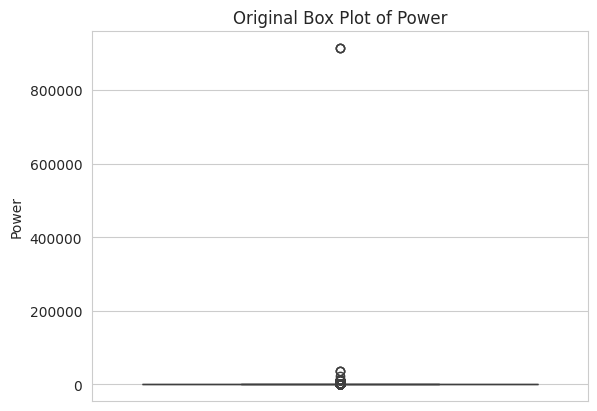

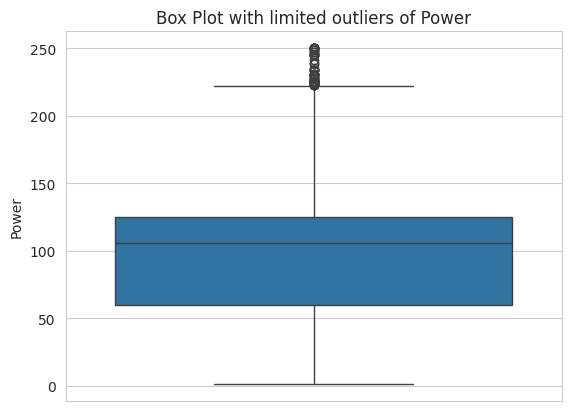

In [ ]:
# checking for outliers in the power column
# as there is a huge difference between the mean and max value
sns.boxplot(ds['Power'])
plt.title('Original Box Plot of Power')
plt.show()

# adding a threshold to values of the column
removed_outliers = ds[ds['Power'] <= 250]

# creating a new boxplot for the column with the threshold applied
sns.boxplot(removed_outliers['Power'])
plt.title('Box Plot with limited outliers of Power')
plt.show()

In [ ]:
# applying the threshold to the dataset
adaptedSet = ds[ds['Power'] < 250]

In [ ]:
# checking the state of the power column after changes
# the mean and max do not differ so much anymore after applying a threshold
adaptedSet.describe()

,Value,Mileage,Power,Make,Month,Year,Fuel Type,Transmission Type,State of Vehicle
count,3.461200e+04,3.461200e+04,34612.000000,34612.000000,34612.000000,34612.000000,34612.000000,34612.000000,34612.000000
mean,4.572178e+04,2.098786e+04,95.179533,104.997082,5.117011,2013.511326,3.016266,0.946695,3.790506
std,4.871148e+06,1.848016e+05,49.363460,69.686630,3.058284,10.062818,0.480766,0.261272,0.690788
min,1.000000e+00,0.000000e+00,1.000000,0.000000,1.000000,1907.000000,0.000000,0.000000,0.000000
25%,7.000000e+03,2.912000e+03,60.000000,54.000000,3.000000,2012.000000,3.000000,1.000000,4.000000
50%,9.950000e+03,1.100000e+04,106.000000,90.000000,5.000000,2016.000000,3.000000,1.000000,4.000000
75%,1.260000e+04,2.500000e+04,125.000000,162.000000,7.000000,2019.000000,3.000000,1.000000,4.000000
max,8.888889e+08,9.999999e+06,249.000000,235.000000,12.000000,2024.000000,6.000000,2.000000,4.000000


## Value Column

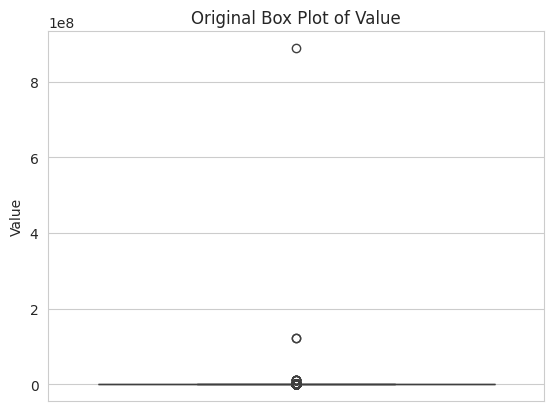

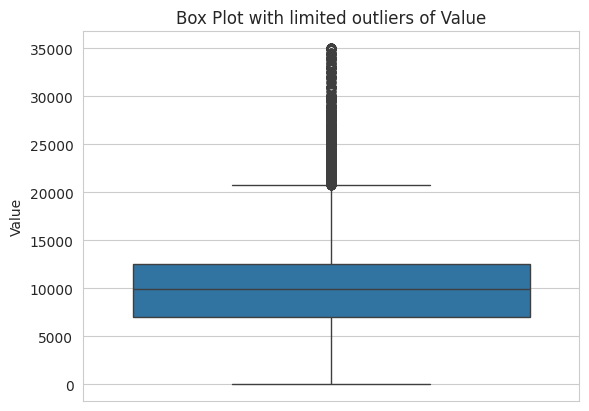

In [ ]:
# checking for outliers in the power column
# as there is a huge difference between the mean and max value
sns.boxplot(adaptedSet['Value'])
plt.title('Original Box Plot of Value')
plt.show()

# adding a threshold to values of the column
removed_outliers = adaptedSet[adaptedSet['Value'] <= 35000]

# creating a new boxplot for the column with the threshold applied
sns.boxplot(removed_outliers['Value'])
plt.title('Box Plot with limited outliers of Value')
plt.show()

In [ ]:
# applying the threshold to the dataset
adaptedSet = adaptedSet[adaptedSet['Value'] < 35000]

In [ ]:
# checking the state of the Value column after changes
# the mean and max do not differ so much anymore after applying a threshold
adaptedSet.describe()

,Value,Mileage,Power,Make,Month,Year,Fuel Type,Transmission Type,State of Vehicle
count,34304.000000,3.430400e+04,34304.000000,34304.000000,34304.000000,34304.000000,34304.000000,34304.000000,34304.000000
mean,10170.539908,1.900401e+04,94.974085,105.129314,5.114768,2013.558769,3.016529,0.946945,3.794660
std,5783.077905,1.185709e+05,49.258181,69.847227,3.050542,9.889960,0.481946,0.261038,0.683461
min,1.000000,0.000000e+00,1.000000,0.000000,1.000000,1907.000000,0.000000,0.000000,0.000000
25%,6999.000000,3.000000e+03,60.000000,54.000000,3.000000,2012.000000,3.000000,1.000000,4.000000
50%,9900.000000,1.104000e+04,106.000000,90.000000,5.000000,2016.000000,3.000000,1.000000,4.000000
75%,12500.000000,2.500000e+04,125.000000,162.000000,7.000000,2019.000000,3.000000,1.000000,4.000000
max,34999.000000,9.999999e+06,249.000000,235.000000,12.000000,2021.000000,6.000000,2.000000,4.000000


## Mileage Column

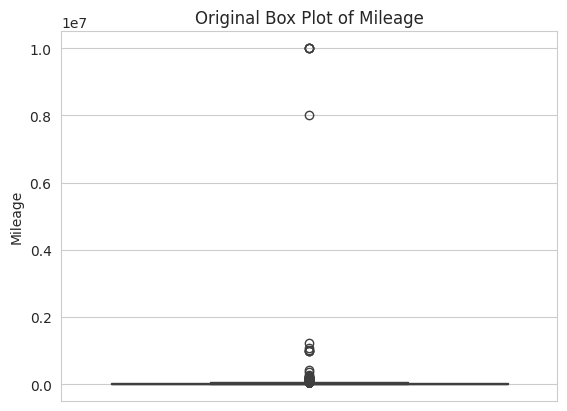

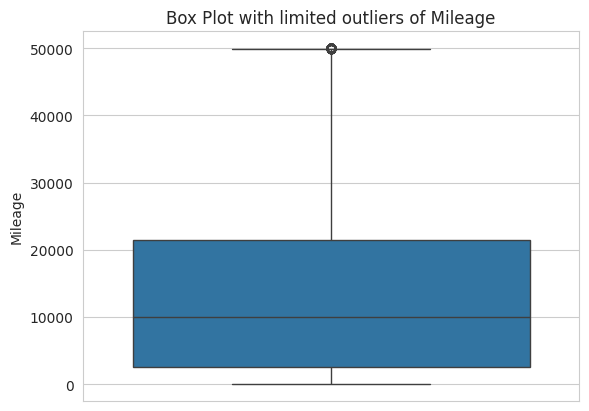

In [ ]:
# checking for outliers in the power column
# as there is a huge difference between the mean and max value
sns.boxplot(adaptedSet['Mileage'])
plt.title('Original Box Plot of Mileage')
plt.show()

# adding a threshold to values of the column
removed_outliers = adaptedSet[adaptedSet['Mileage'] <= 50000]

# creating a new boxplot for the column with the threshold applied
sns.boxplot(removed_outliers['Mileage'])
plt.title('Box Plot with limited outliers of Mileage')
plt.show()

In [ ]:
# applying the threshold to the dataset
adaptedSet = adaptedSet[adaptedSet['Mileage'] < 50000]

In [ ]:
# checking the state of the Value column after changes
# the mean and max do not differ so much anymore after applying a threshold
adaptedSet.describe()

,Value,Mileage,Power,Make,Month,Year,Fuel Type,Transmission Type,State of Vehicle
count,31916.000000,31916.000000,31916.000000,31916.000000,31916.000000,31916.000000,31916.000000,31916.000000,31916.000000
mean,10228.695639,13525.213937,94.638269,107.271431,5.120378,2014.083281,3.017421,0.943978,3.782429
std,5859.879612,12832.809438,49.842907,69.605512,3.061885,9.450510,0.494377,0.266450,0.698226
min,1.000000,0.000000,1.000000,0.000000,1.000000,1907.000000,0.000000,0.000000,0.000000
25%,6999.000000,2500.000000,58.000000,54.000000,3.000000,2012.000000,3.000000,1.000000,4.000000
50%,9950.000000,9957.000000,106.000000,90.000000,5.000000,2016.000000,3.000000,1.000000,4.000000
75%,12590.000000,21203.000000,125.000000,163.000000,7.000000,2019.000000,3.000000,1.000000,4.000000
max,34999.000000,49999.000000,249.000000,235.000000,12.000000,2021.000000,6.000000,2.000000,4.000000


## Visualisation

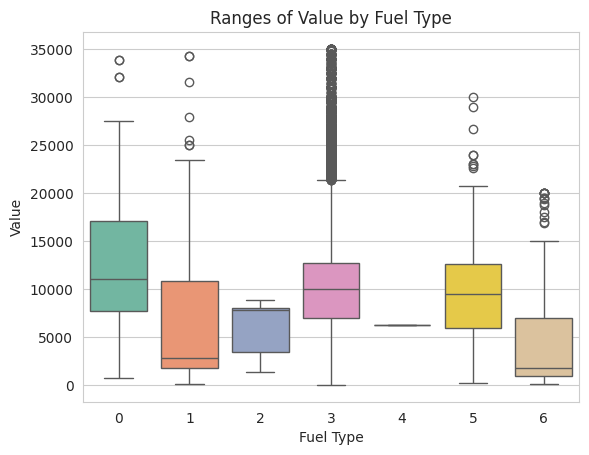

In [ ]:
sns.boxplot(data = adaptedSet, x = adaptedSet["Fuel Type"], y = adaptedSet["Value"], palette = "Set2")
plt.title('Ranges of Value by Fuel Type')
plt.show()

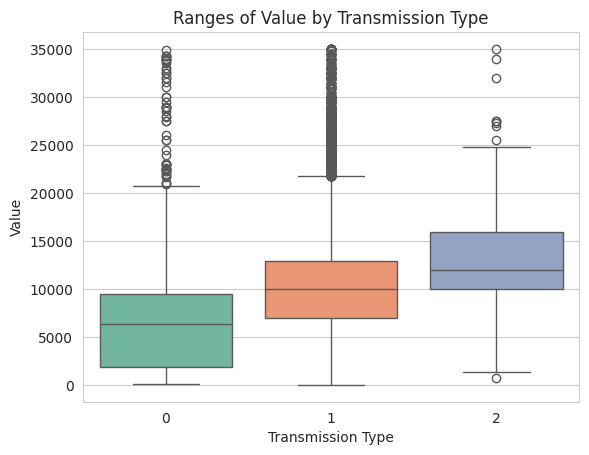

In [ ]:
sns.boxplot(data = adaptedSet, x = 'Transmission Type', y = 'Value', palette = "Set2")
plt.title('Ranges of Value by Transmission Type')
plt.show()

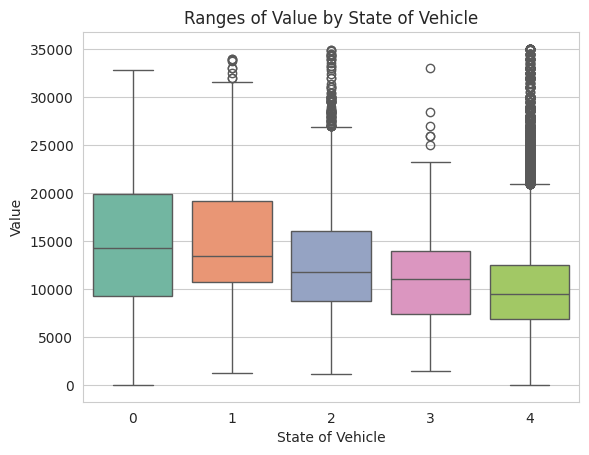

In [ ]:
sns.boxplot(data = adaptedSet, x = 'State of Vehicle', y = 'Value', palette = "Set2")
plt.title('Ranges of Value by State of Vehicle')
plt.show()

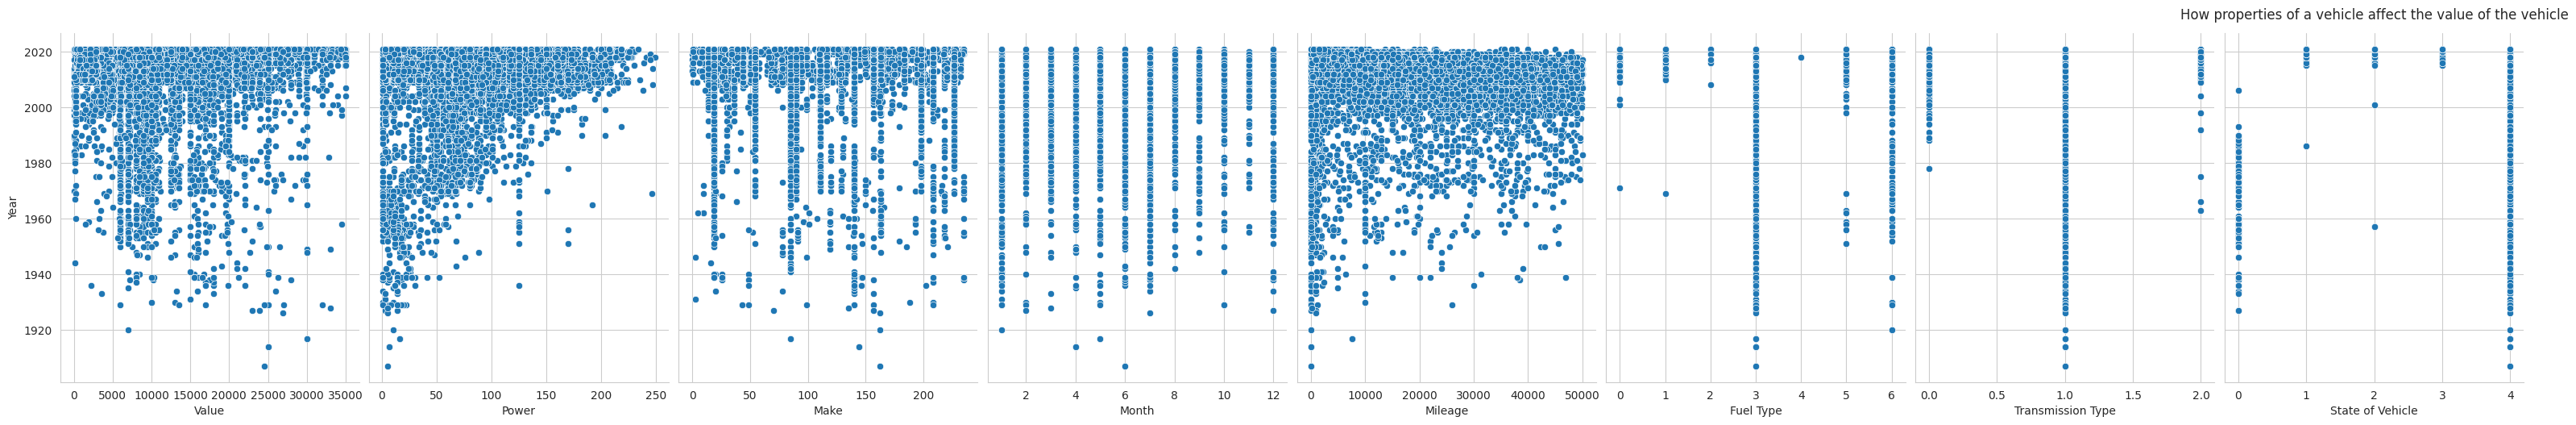

In [ ]:
# comparing all the properties of a vehicle to see how they affect the value of it
sns.pairplot(adaptedSet, x_vars=['Value', 'Power', 'Make', 'Month', 'Mileage', 'Fuel Type', 'Transmission Type', 'State of Vehicle'], y_vars='Year', height=5, aspect=0.8, kind='scatter')
plt.title('How properties of a vehicle affect the value of the vehicle', y=1.02)
plt.show()

In [ ]:
# shows all possible pairings
sns.pairplot(adaptedSet, hue='Value')

# Training different models

In [ ]:
# selecting the columns to use for training the model
dsLearn = adaptedSet[['Mileage',
              'Power',
              'Make',
              'Fuel Type',
              'Transmission Type',
              'State of Vehicle',
              'Year',
              'Value']]

In [ ]:
# allocating the columns from Mileage to Year as x - the data used to predict
x = dsLearn.iloc[:, 0 : -1]

x.head() # checking if the correct columns have been selected

,Mileage,Power,Make,Fuel Type,Transmission Type,State of Vehicle,Year
0,150,218.0,90,3,1,1,2020
1,2871,90.0,19,3,1,4,2018
2,1700,3.0,151,3,1,4,2019
3,24345,125.0,14,3,1,4,2016
4,25000,128.0,111,3,1,4,2009


In [ ]:
# allocating the column Value as y - what i am trying to predict
y = dsLearn.iloc[:, -1:, ]

y.head() # checking if the correct columns have been selected

,Value
0,23990
1,7500
2,800
3,14990
4,6200


In [ ]:
# separating the data into test and train data
xTrain, xTest, yTrain, yTest = train_test_split(x, y, random_state=42, test_size=0.2)

## Linear Regression

In [ ]:
# initalise and train the linear regression model
lrModel = LinearRegression()
lrModel.fit(xTrain, yTrain)

# make predictions
yPrediction = lrModel.predict(xTest)

# evaluating the model
mse = mean_squared_error(yPrediction, yTest)
sqrt_mse = np.sqrt(mse)
mae = mean_absolute_error(yPrediction, yTest)
r2 = r2_score(yTest, yPrediction)
coefficient = lrModel.score(xTrain, yTrain)
print(f"MSE : {mse:.3f} \nMSE_SQRT : {sqrt_mse:.3f} \nMAE : {mae:.3f} \nR2 Score : {r2:.3f} \nCoefficient : {coefficient:.3f}")

MSE : 23448961.984 
MSE_SQRT : 4842.413 
MAE : 3530.499 
R2 Score : 0.295 
Coefficient : 0.309


In [ ]:
# showing statistics of the model
print("Intercept:", lrModel.intercept_,
      "\nCoeficcient:", lrModel.coef_,
      "\nScore of the training data:", lrModel.score(xTrain, yTrain),
      "\nScore of the test data:", lrModel.score(xTest, yTest))

Intercept: [177548.00332845] 
Coeficcient: [[-6.73622580e-02  5.41959372e+01 -1.52514278e+01 -6.46223166e+02
   9.74048691e+02 -9.59503505e+02 -8.20402174e+01]] 
Score of the training data: 0.309435760550296 
Score of the test data: 0.295066872506091


## Decision Tree Regression

In [ ]:
# initialise and train the Decision Tree Regressor model
dtModel = DecisionTreeRegressor(random_state=42)
dtModel.fit(xTrain, yTrain)

# make predictions
y_pred_dt = dtModel.predict(xTest)

# evaluating the model
mse_dt = mean_squared_error(yTest, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae = mean_absolute_error(y_pred_dt, yTest)
r2_dt = r2_score(yTest, y_pred_dt)

print("Decision Tree Regressor Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2 Score): {r2_dt:.2f}") # shows how much of an impact the independant variables (features) have on the dependant value (prediction)


Decision Tree Regressor Evaluation Metrics:
Mean Squared Error (MSE): 15346950.89
Root Mean Squared Error (RMSE): 3917.52
Mean Absolute Error (MAE): 2110.60
R-squared (R2 Score): 0.54


In [ ]:
# showing statistics of the model
print("Score of the train data:",
      dtModel.score(xTrain, yTrain),
      "\nScore of the test data:",
      dtModel.score(xTest, yTest))

Score of the train data: 0.9623127313254756 
Score of the test data: 0.538633134606625


## Random Forest Regression

In [ ]:
# initialise and train the Random Forest Regressor model
rfModel = RandomForestRegressor(random_state=42, n_estimators=100)
rfModel.fit(xTrain, yTrain)

# make predictions
y_pred_rf = rfModel.predict(xTest)

# evaluating the model
mse_rf = mean_squared_error(yTest, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae = mean_absolute_error(y_pred_rf, yTest)
r2_rf = r2_score(yTest, y_pred_rf)

print("Random Forest Regressor Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2 Score): {r2_rf:.2f}")


Random Forest Regressor Evaluation Metrics:
Mean Squared Error (MSE): 10104375.75
Root Mean Squared Error (RMSE): 3178.74
Mean Absolute Error (MAE): 1900.77
R-squared (R2 Score): 0.70


In [ ]:
# showing statistics of the model
print("Score of the train data:", rfModel.score(xTrain, yTrain),
      "\nScore of the test data:", rfModel.score(xTest, yTest))

Score of the train data: 0.9262014748290451 
Score of the test data: 0.6962377607520622


## Lasso Regression

In [ ]:
# initialising and fitting the training data onto the model
laModel = Lasso(alpha= 0.4)
laModel.fit(xTrain, yTrain)

# make predictions
yPred = laModel.predict(xTest)

# evaluating the model
mse = round(mean_squared_error(yPred, yTest, squared= False),  2 )
rmse = np.sqrt(mse)
mae = mean_absolute_error(yPred, yTest)
r2 = r2_score(yPred, yTest)

print('Lasso Regression Evaluation Metrics')
print('Mean Squared Error : ', mse)
print('Root Mean Squared Error',  rmse)
print('Mean Absolute Error : ', mae)
print('R2_Squared  ', r2)

Lasso Regression Evaluation Metrics
Mean Squared Error :  4842.37
Root Mean Squared Error 69.58713961645499
Mean Absolute Error :  3530.468294790894
R2_Squared   -1.263307574257551


In [ ]:
# showing statistics of the model
print("Score of the train data:", laModel.score(xTrain, yTrain),
      "\nScore of the test data:", laModel.score(xTest, yTest))

Score of the train data: 0.3094356516971968 
Score of the test data: 0.2950790620331286


# User input & prediction

**The parameters you need for predicting a the Value are in this order:**
- Mileage
- Power
- Make
- Fuel Type
- Transmission Type
- State of Vehicle
- Year

**Values for Make are found in make.txt file**

**Values for Fuel Type parameter**
- Diesel = 0
- Electric = 1
- Electric/Gasoline = 2
- Gasoline = 3
- LPG = 4
- Others = 5
- Two Stroke Gasoline = 6

**Values for Transmission Type parameter**
- Automatic = 0
- Manual = 1
- Semi-automatic = 2

**Values for State of Vehicle parameter**
- Antique / Classic = 0
- Demonstration = 1
- New = 2
- Pre-registered = 3
- Used = 4

In [ ]:
# using linear regression to predict the value of a motorbike based on given parameters
val1 = lrModel.predict([[2500, 125, 111, 1, 1, 1, 2019]]) # change variables here to have different values on output
value1 = val1[0][0]
print(f'Predicted Value of Vehicle = €{value1:.2f}')

Predicted Value of Vehicle = €16190.30


In [ ]:
# using decision tree regression to predict the value of a motorbike based on given parameters
val2 = dtModel.predict([[2500, 125, 111, 1, 1, 1, 2019]]) # change variables here to have different values on output
value2 = val2[0]
print(f'Predicted Value of Vehicle = €{value2:.2f}')

Predicted Value of Vehicle = €6150.00


In [ ]:
# using random forest regression to predict the value of a motorbike based on given parameters
val3 = rfModel.predict([[2500, 125, 111, 1, 1, 1, 2019]]) # change variables here to have different values on output
value3 = val3[0]
print(f'Predicted Value of Vehicle = €{value3:.2f}')

Predicted Value of Vehicle = €7304.23


In [ ]:
# using lasso regression to predict the value of a motorbike based on given parameters
val4 = laModel.predict([[2500, 125, 111, 1, 1, 1, 2019]]) # change variables here to have different values on output
value4 = val4[0]
print(f'Predicted Value of Vehicle = €{value4:.2f}')

Predicted Value of Vehicle = €16183.76
